# Model: Logistic Regression

### Importing Libraries

In [1]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Loading in Data

In [2]:
df = pd.read_excel('../top10_corr_features.xlsx')
df = df.drop(df.columns[0], axis = 1)

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the Data

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Helper Functions

#### Function for plotting confusion matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Modeling
The preferred evaluation metric used will be __Precision__ for each class.  They will be optimized using the __F1 Score-Macro-Average__ to balance the Precision and Recall.  This is done because we want to not only be correct when predicting but also make a decent amount of predictions for each class.  Classes such as 'Buy' and 'Sell' are more important than 'Hold'.

### Fitting and Training

In [6]:
# Importing the model
from sklearn.linear_model import LogisticRegression

# Fitting and training
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Printing out Evaluation Metrics

In [7]:
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       1.00      0.33      0.50         9
         Buy       0.38      0.83      0.53         6
        Hold       0.00      0.00      0.00         2

    accuracy                           0.47        17
   macro avg       0.46      0.39      0.34        17
weighted avg       0.67      0.47      0.45        17



### Confusion Matrix

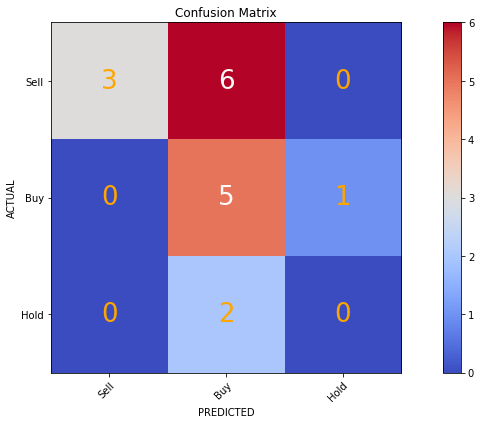

In [8]:
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

## Tuning Model Parameters

In [9]:
from sklearn.model_selection import GridSearchCV

### Parameters

In [10]:
# Parameters to Tune
params = {'penalty': ['l1', 'l2'],
          'C': [1.5**n for n in range(0, 10, 2)],
          'fit_intercept': [True, False],
          'intercept_scaling': [1, 10, 50],
          'solver': ['liblinear', 'saga']}

In [11]:
search = GridSearchCV(clf, params, cv=3, return_train_score=True, verbose=5, scoring='f1_macro')

search.fit(X,y)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.506, test=0.293), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.444, test=0.284), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.417, test=0.275), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.484, test=0.293), total=   0.1s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=1.0, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\l

[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.487, test=0.370), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.506, test=0.293), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.444, test=0.284), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.415, test=0.275), total=   0.0s
[CV] C=1.0, fit_interc

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.506, test=0.293), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.444, test=0.284), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.415, test=0.275), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.484, test=0.293), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.444, test=0.312), total=   0.0s
[CV] C=1.0, fit_intercep

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', 

[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.487, test=0.370), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.484, test=0.269), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.478, test=0.299), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.556, test=0.351), total=   0.0s
[CV] C=1.0, fit_int

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.484, test=0.269), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.478, test=0.299), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.556, test=0.351), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.484, test=0.235), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.468, test=0.299), total=   0.0s
[CV] C=1.0, fit

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "


[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.477, test=0.235), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.468, test=0.339), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.457, test=0.351), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.477, test=0.235), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, p

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.506, test=0.293), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.495, test=0.322), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.415, test=0.370), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.504, test=0.257), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=2.25, fit_intercept=Tr

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "


[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.495, test=0.322), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.433, test=0.263), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.506, test=0.293), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.495, test=0.322), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1,

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'pr


[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.495, test=0.322), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.415, test=0.370), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.504, test=0.293), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalt

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning


[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.512, test=0.351), total=   0.0s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.506, test=0.269), total=   0.0s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.468, test=0.299), total=   0.0s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.474, test=0.351), total=   0.0s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, p

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.512, test=0.351), total=   0.0s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.506, test=0.269), total=   0.0s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.468, test=0.299), total=   0.0s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.474, test=0.351), total=   0.0s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.477, test=0.235), total=   0.0s
[

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option


[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.462, test=0.299), total=   0.0s
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.474, test=0.351), total=   0.0s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.545, test=0.327), total=   0.0s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.495, test=0.284), total=   0.0s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', 

[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.495, test=0.322), total=   0.0s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.539, test=0.199), total=   0.0s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.504, test=0.293), total=   0.0s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.487, test=0.307), total=   0.0s
[CV] C=

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', 

[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.495, test=0.322), total=   0.0s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.539, test=0.199), total=   0.0s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.504, test=0.293), total=   0.0s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.487, test=0.307), total=   0.0s
[CV] C=

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.491, test=0.351), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.504, test=0.263), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.478, test=0.299), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.491, test=0.325), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.477, test=0.235), total=

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning


[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.478, test=0.299), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.491, test=0.325), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.477, test=0.235), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.467, test=0.299), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=5.0625, fit_intercept=False, int

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.504, test=0.263), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.478, test=0.299), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.491, test=0.325), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.477, test=0.235), total=   0.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.468, test=0.299), t

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning


[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.525, test=0.293), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.539, test=0.277), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.504, test=0.257), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=11.390625, fi

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence 


[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.487, test=0.271), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.525, test=0.327), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=11.390625

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning


[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.543, test=0.325), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.541, test=0.171), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.504, test=0.293), total=   0.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=11.3

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', 


[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.484, test=0.235), total=   0.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.468, test=0.299), total=   0.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.491, test=0.351), total=   0.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.504, test=0.263), total=   0.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=11.390625, fit_inte

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si

[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.491, test=0.351), total=   0.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.504, test=0.263), total=   0.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.478, test=0.299), total=   0.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.529, test=0.325), total=   0.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, sco

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning


[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.477, test=0.235), total=   0.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.467, test=0.299), total=   0.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.491, test=0.351), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.562, test=0.292), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=25.6289062

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.504, test=0.271), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.581, test=0.292), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinea

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conver


[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.504, test=0.257), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.504, test=0.277), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.581, test=0.292), total=   0.0s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this w


[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.558, test=0.171), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.504, test=0.257), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.478, test=0.284), total=   0.1s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', 


[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.539, test=0.248), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.504, test=0.257), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.478, test=0.284), total=   0.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.491, test=0.351), total=   0.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.504, test=0.269), total=   0.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.478, test=0.299), total=   0.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.529, test=0.325), total=   0.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si

[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.478, test=0.299), total=   0.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.529, test=0.325), total=   0.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.454, test=0.235), total=   0.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.468, test=0.299), total=   0.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.478, test=0.299), total=   0.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.529, test=0.325), total=   0.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.454, test=0.235), total=   0.1s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.467, test=0.299), total=   0.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 2.25, 5.0625, 11.390625, 25.62890625],
                         'fit_intercept': [True, False],
                         'intercept_scaling': [1, 10, 50],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit

### Tuned Results

In [12]:
print("Mean Training Score:", np.mean(search.cv_results_['mean_train_score']))
print("Mean Testing Score:", search.score(X, y))
print("\nBest Parameter Found:")
search.best_params_

Mean Training Score: 0.4927243359818397
Mean Testing Score: 0.39677177177177175

Best Parameter Found:


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'C': 2.25,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'penalty': 'l1',
 'solver': 'saga'}

### Model with the Best Parameters

In [13]:
search_clf = search.best_estimator_

search_clf.fit(X_train, y_train)

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=2.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

#### Results from Optimum Parameters

In [14]:
# Classifier predictions
s_pred = search_clf.predict(X_test)

#Printing out results
report = classification_report(y_test, s_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.75      0.33      0.46         9
         Buy       0.33      0.67      0.44         6
        Hold       0.00      0.00      0.00         2

    accuracy                           0.41        17
   macro avg       0.36      0.33      0.30        17
weighted avg       0.51      0.41      0.40        17



### Confusion Matrix for Optimum Parameters

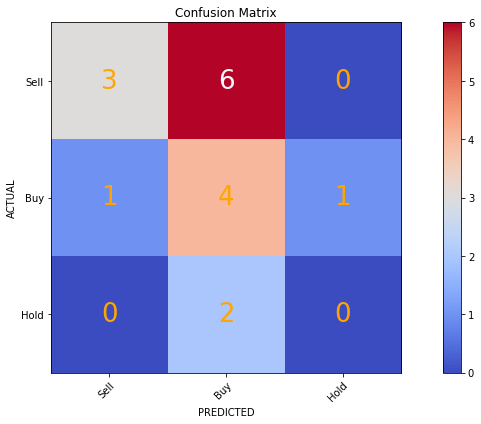

In [15]:
plot_confusion_matrix(y_test, s_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()